In [157]:
from globalemu.eval import evaluate
import matplotlib.pyplot as plt
import scienceplots
import numpy as np
plt.style.use('science')
plt.rcParams['text.usetex'] = False

In [158]:
f0 = 1420.420 # MHz
def z_to_nu(z):
    return f0 / (1 + z)
def nu_to_z(nu):
    return f0 / nu - 1

In [159]:

fstar = 1e-1 # Star formation efficiency
vc = 16.5 # Minimum virial circular velocity
fx = 1 # X-ray efficiency
tau = 0.055 # CMB optical depth
alpha = 1.25 # Power of X-ray spectral energy density slope
nu_min = 1.5 # Low Energy Cut Off of X-ray spectral energy density
R_mfp = 30 # Mean Free Path of Ionizing Photons

params = [fstar, vc, fx, tau, alpha, nu_min, R_mfp]

predictor = evaluate(base_dir='T_release/') # Redshift-Temperature Network
signal_redshift_temp, z_redshift_temp = predictor(params)
nu_redshift_temp = z_to_nu(z_redshift_temp)


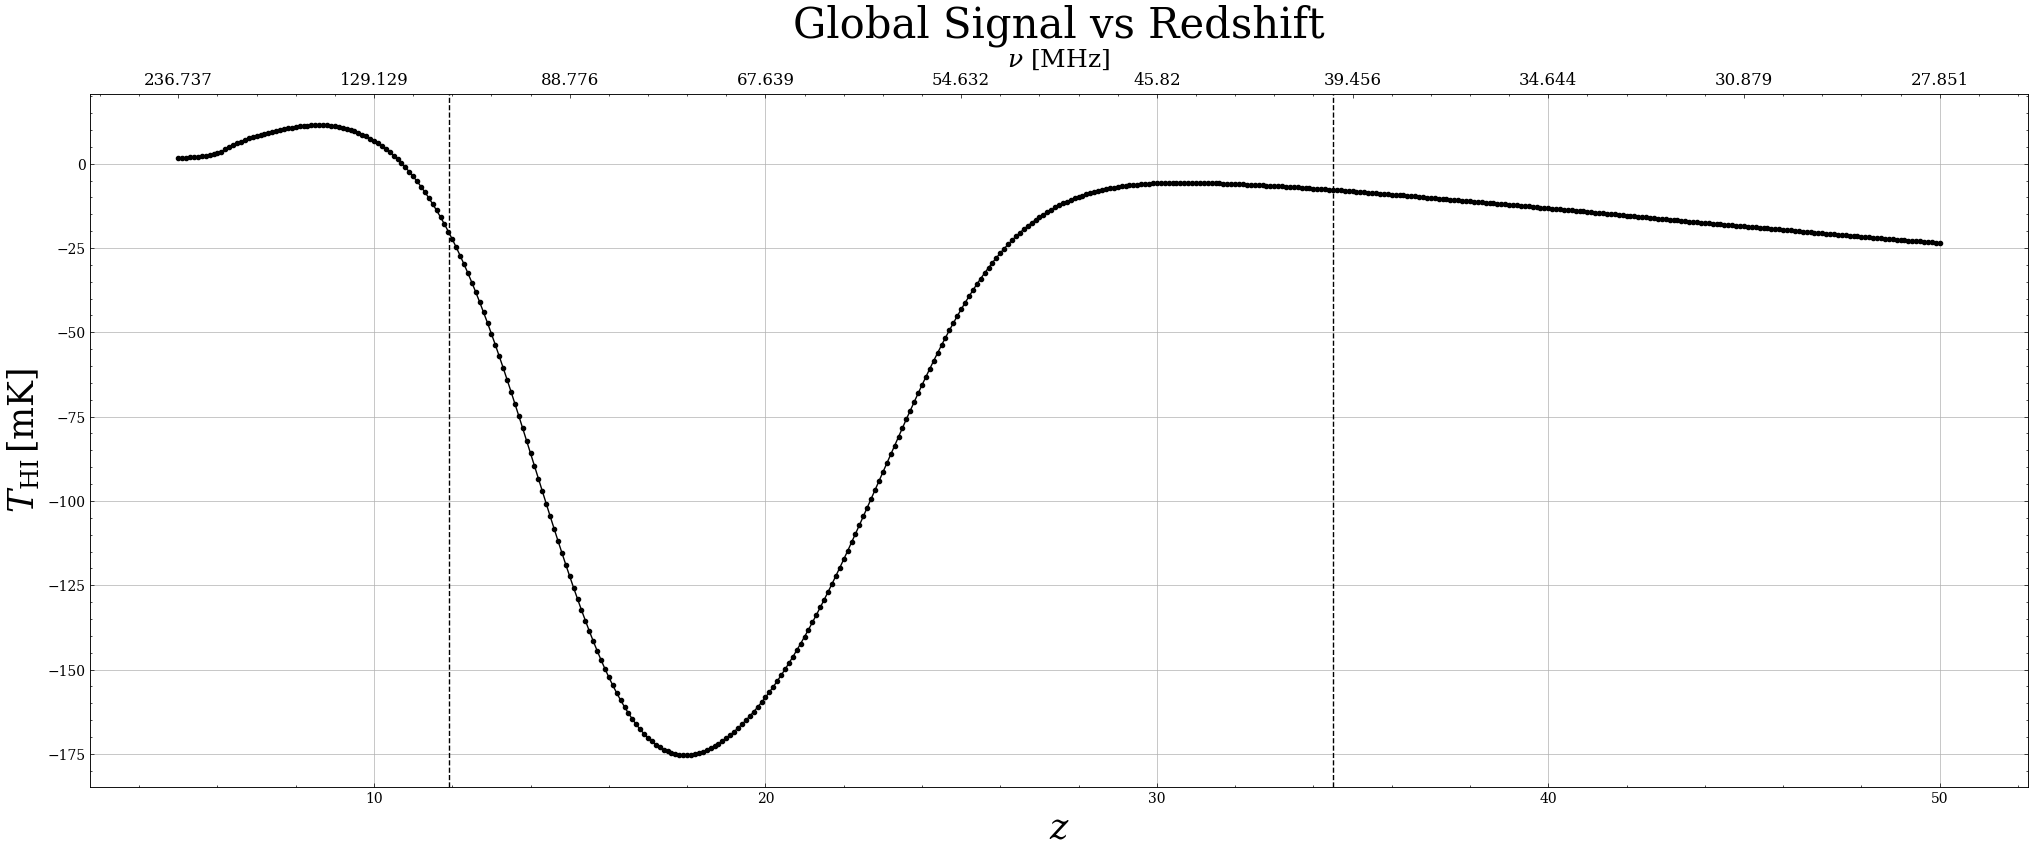

In [160]:

plt.figure(figsize=(25,9))
ax = plt.gca()
ax.plot(z_redshift_temp, signal_redshift_temp, 'o-', color='black', markersize=3)
ax.set_xlabel(r'$z$', fontsize=25)
ax.set_ylabel(r'$T_{\mathrm{HI}}\,[\mathrm{mK}]$', fontsize=25)
ax.set_title('Global Signal vs Redshift', fontsize=30)
ax.grid()

# top x-axis showing frequency corresponding to the redshift points
ax_top = ax.twiny()
ax_top.set_xlim(ax.get_xlim())
ax_top.axvline(x=nu_to_z(40), color='black', linestyle='--', linewidth=1)
ax_top.axvline(x=nu_to_z(110), color='black', linestyle='--', linewidth=1)
# choose a manageable number of tick labels
num_ticks = 10
indices = np.linspace(0, len(z_redshift_temp)-1, num_ticks, dtype=int)
ticks_z = z_redshift_temp[indices]
labels_nu = np.round(nu_redshift_temp[indices], 3)

ax_top.set_xticks(ticks_z)
ax_top.set_xticklabels(labels_nu, fontsize=12)
ax_top.set_xlabel(r'$\nu\ [\mathrm{MHz}]$', fontsize=18)

plt.show()

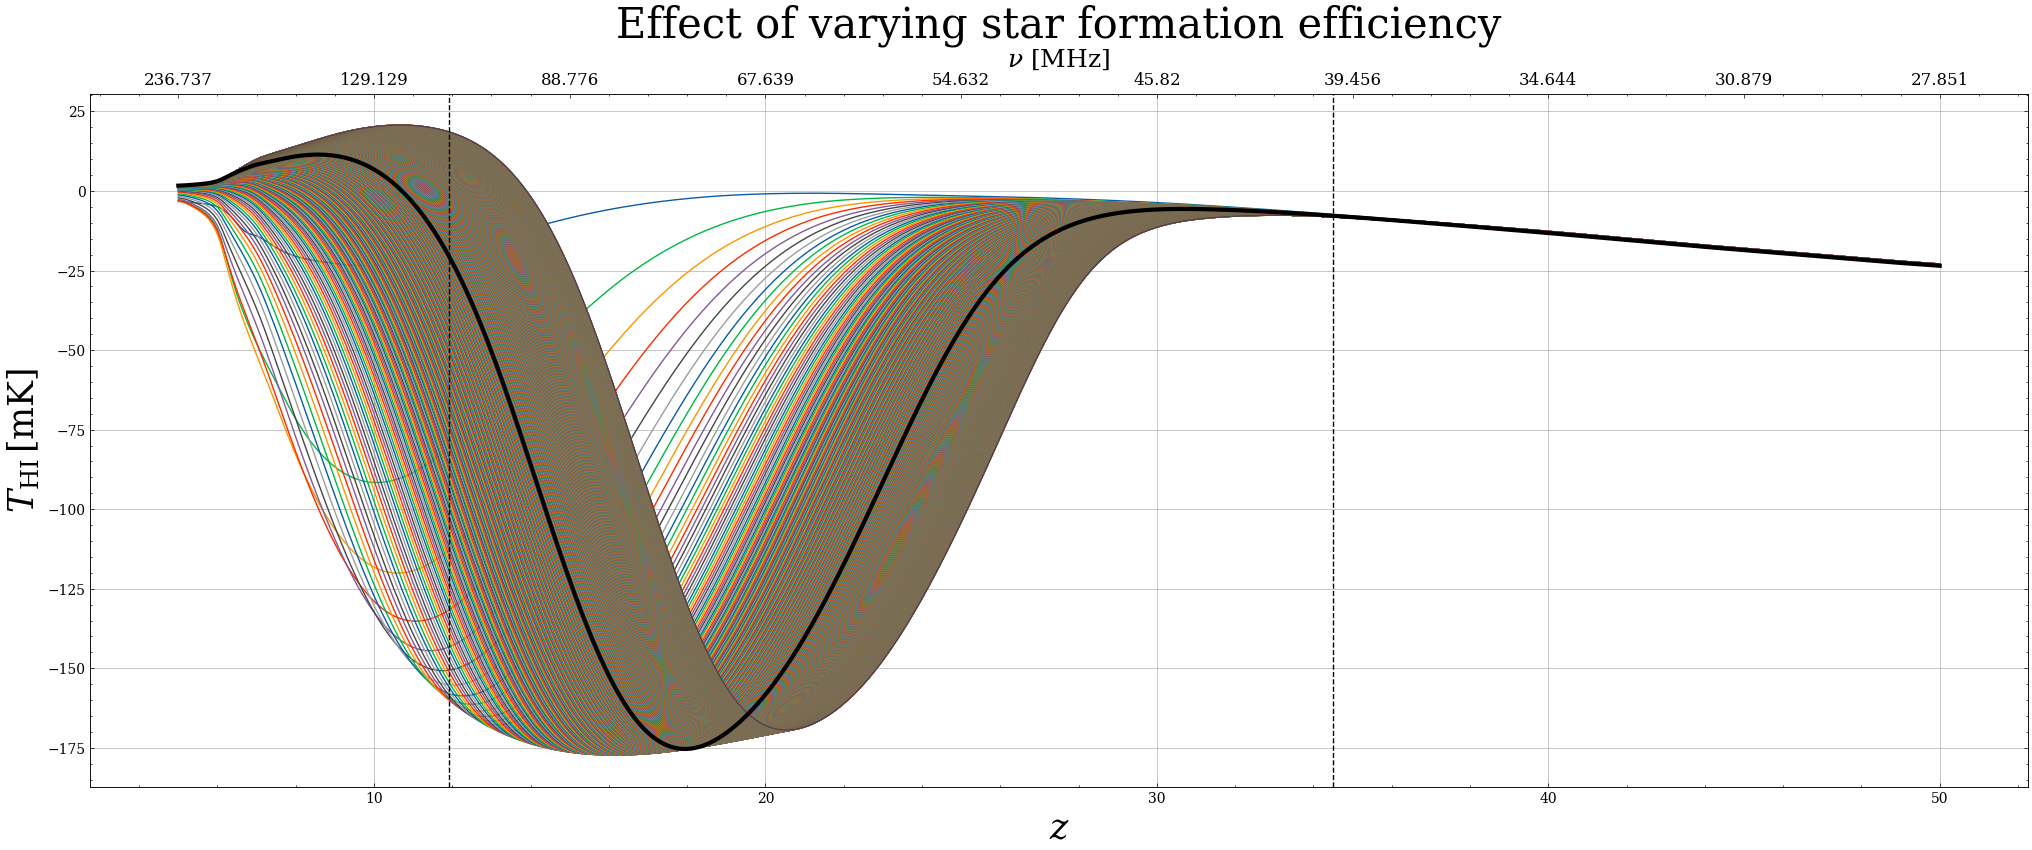

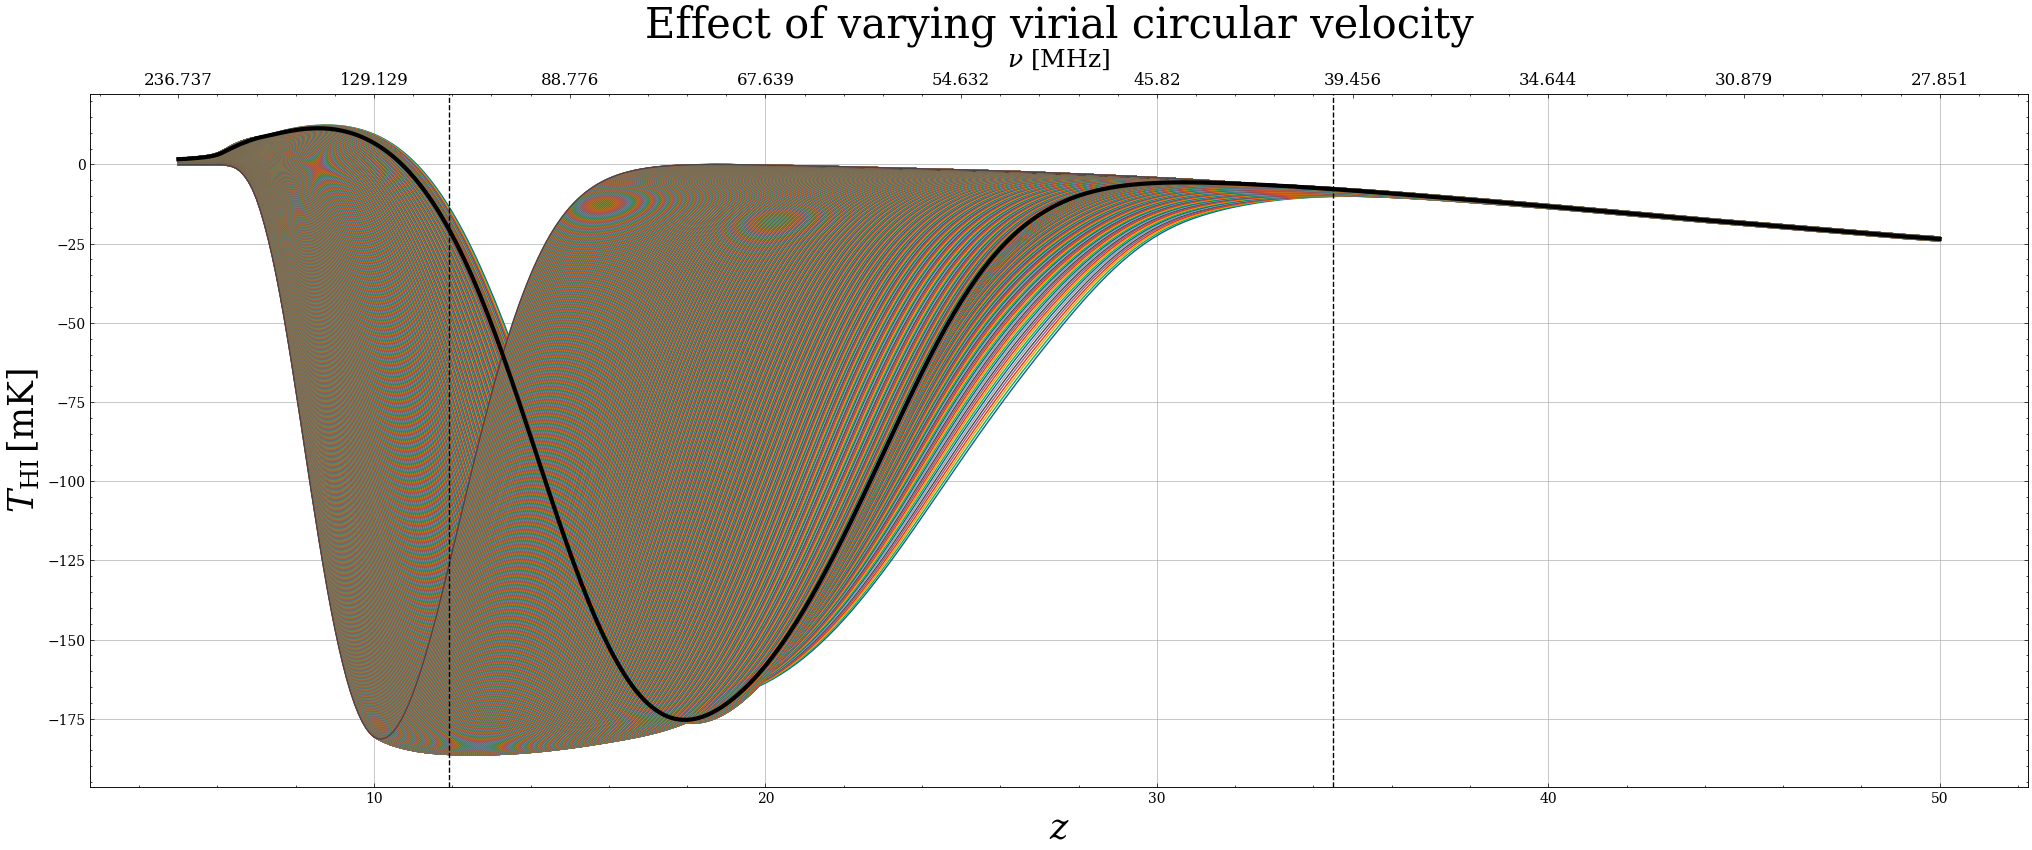

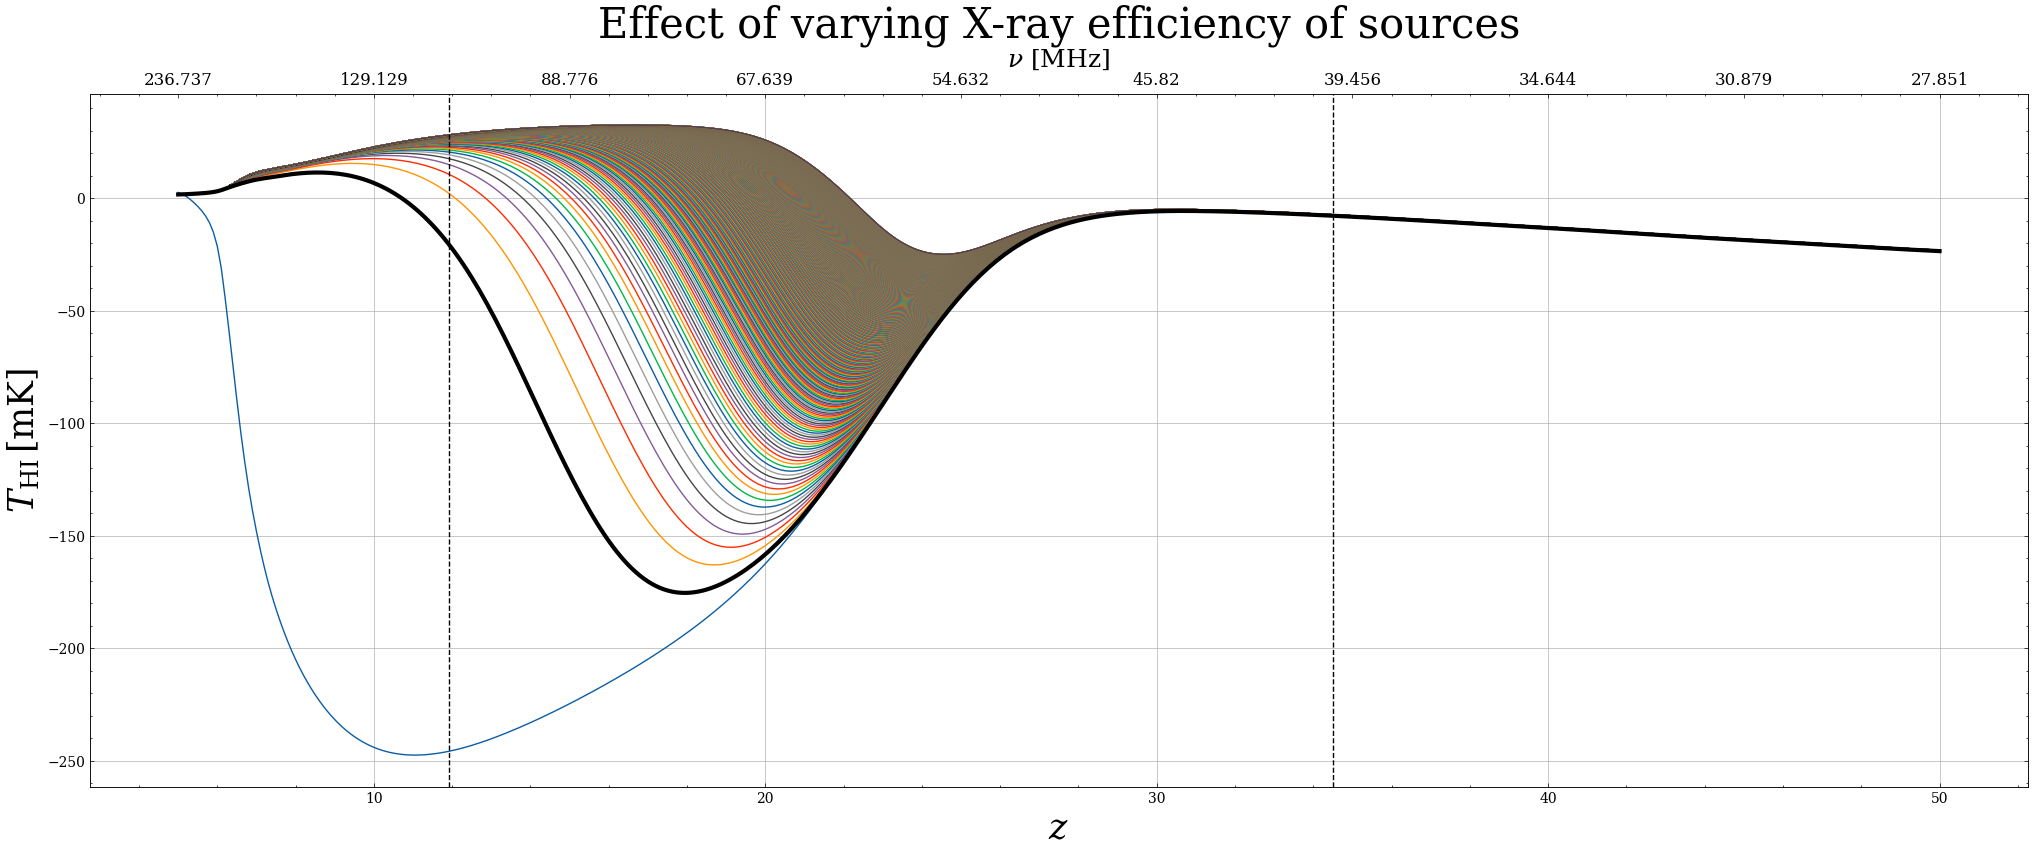

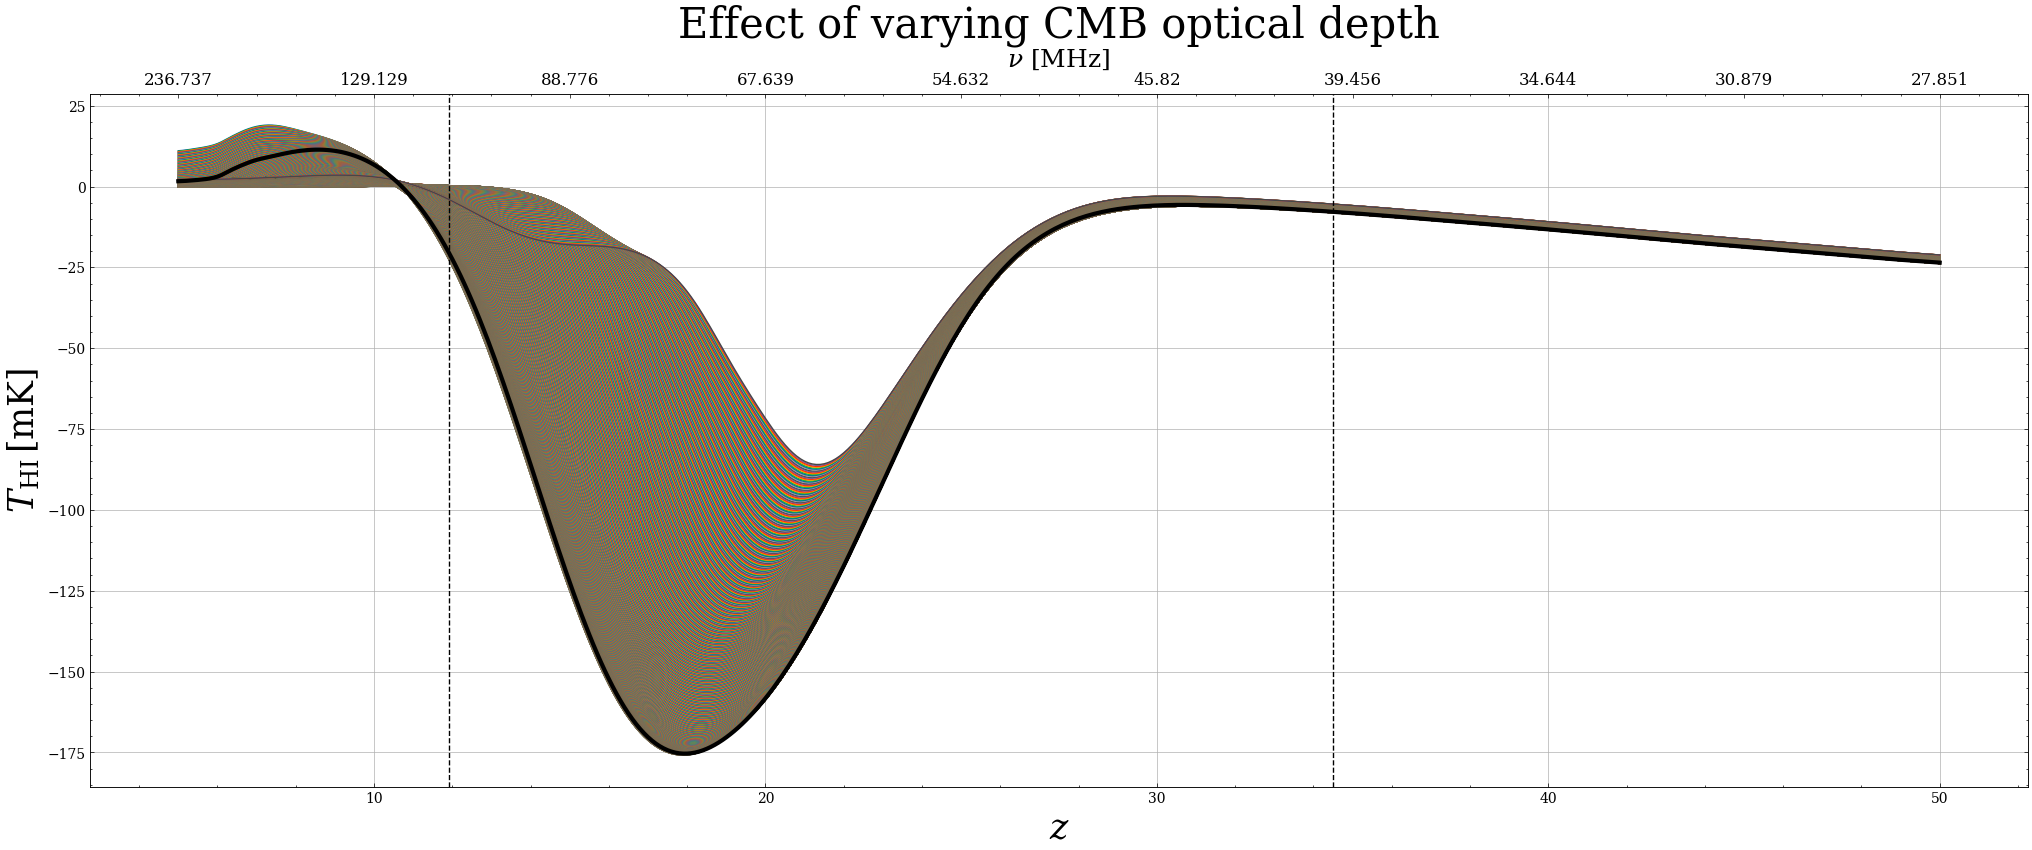

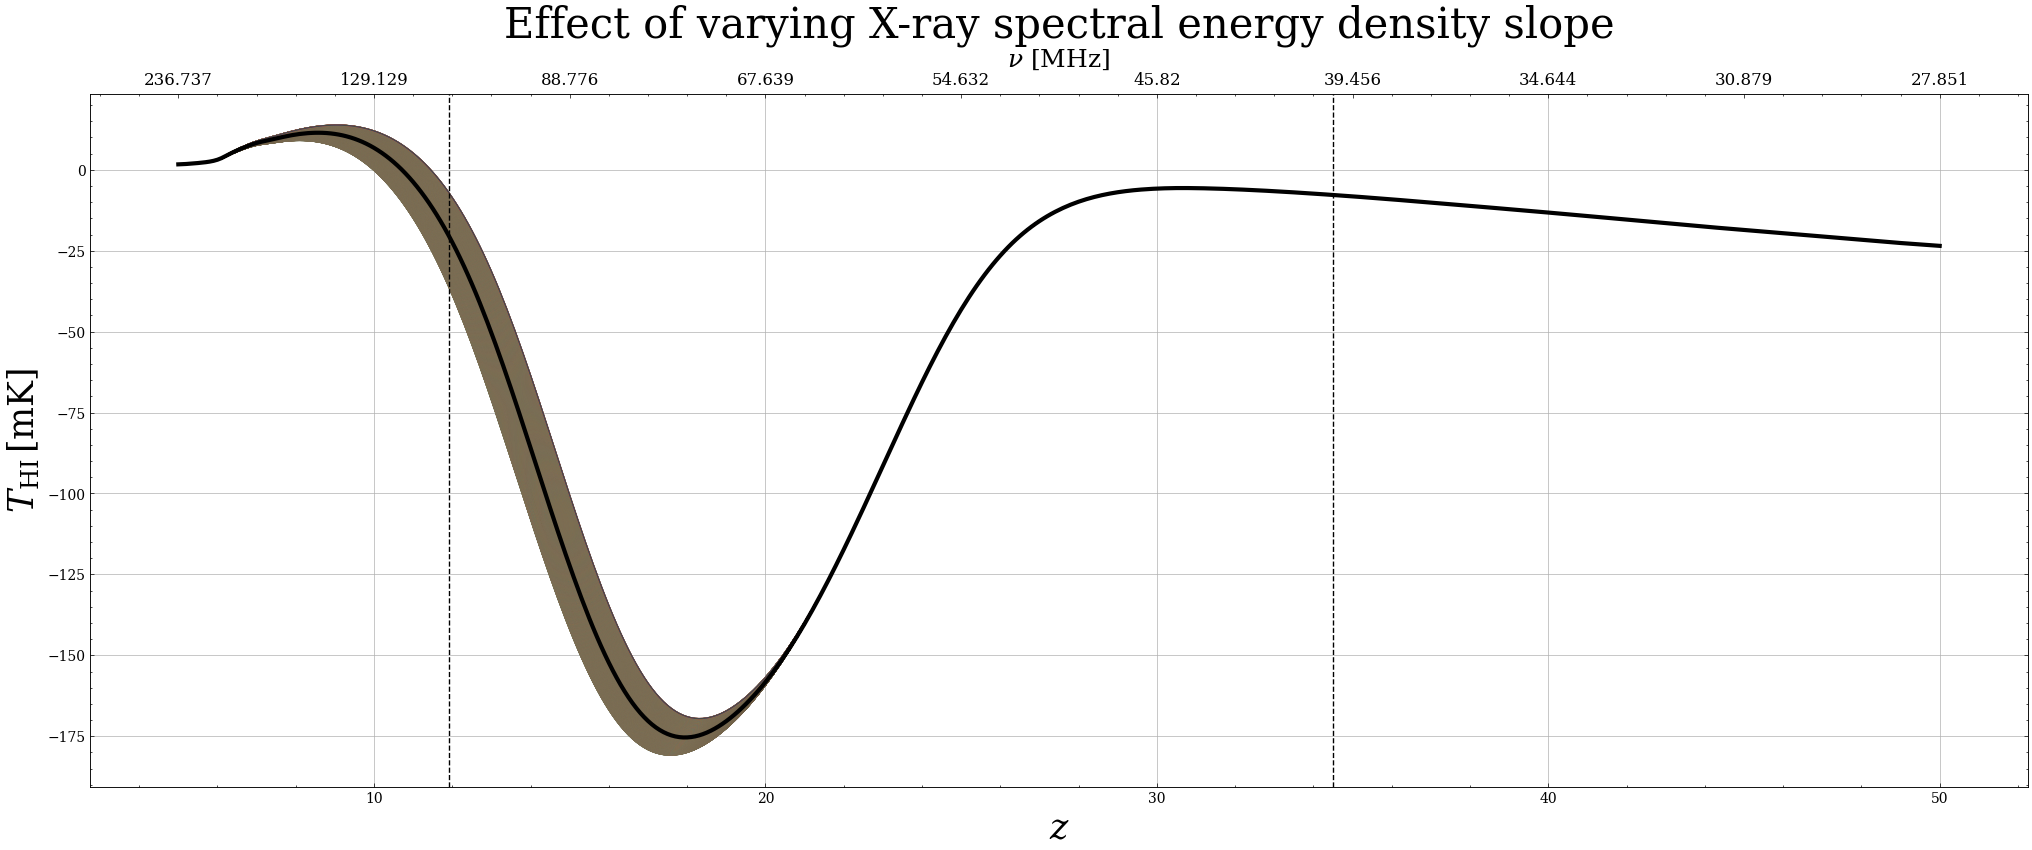

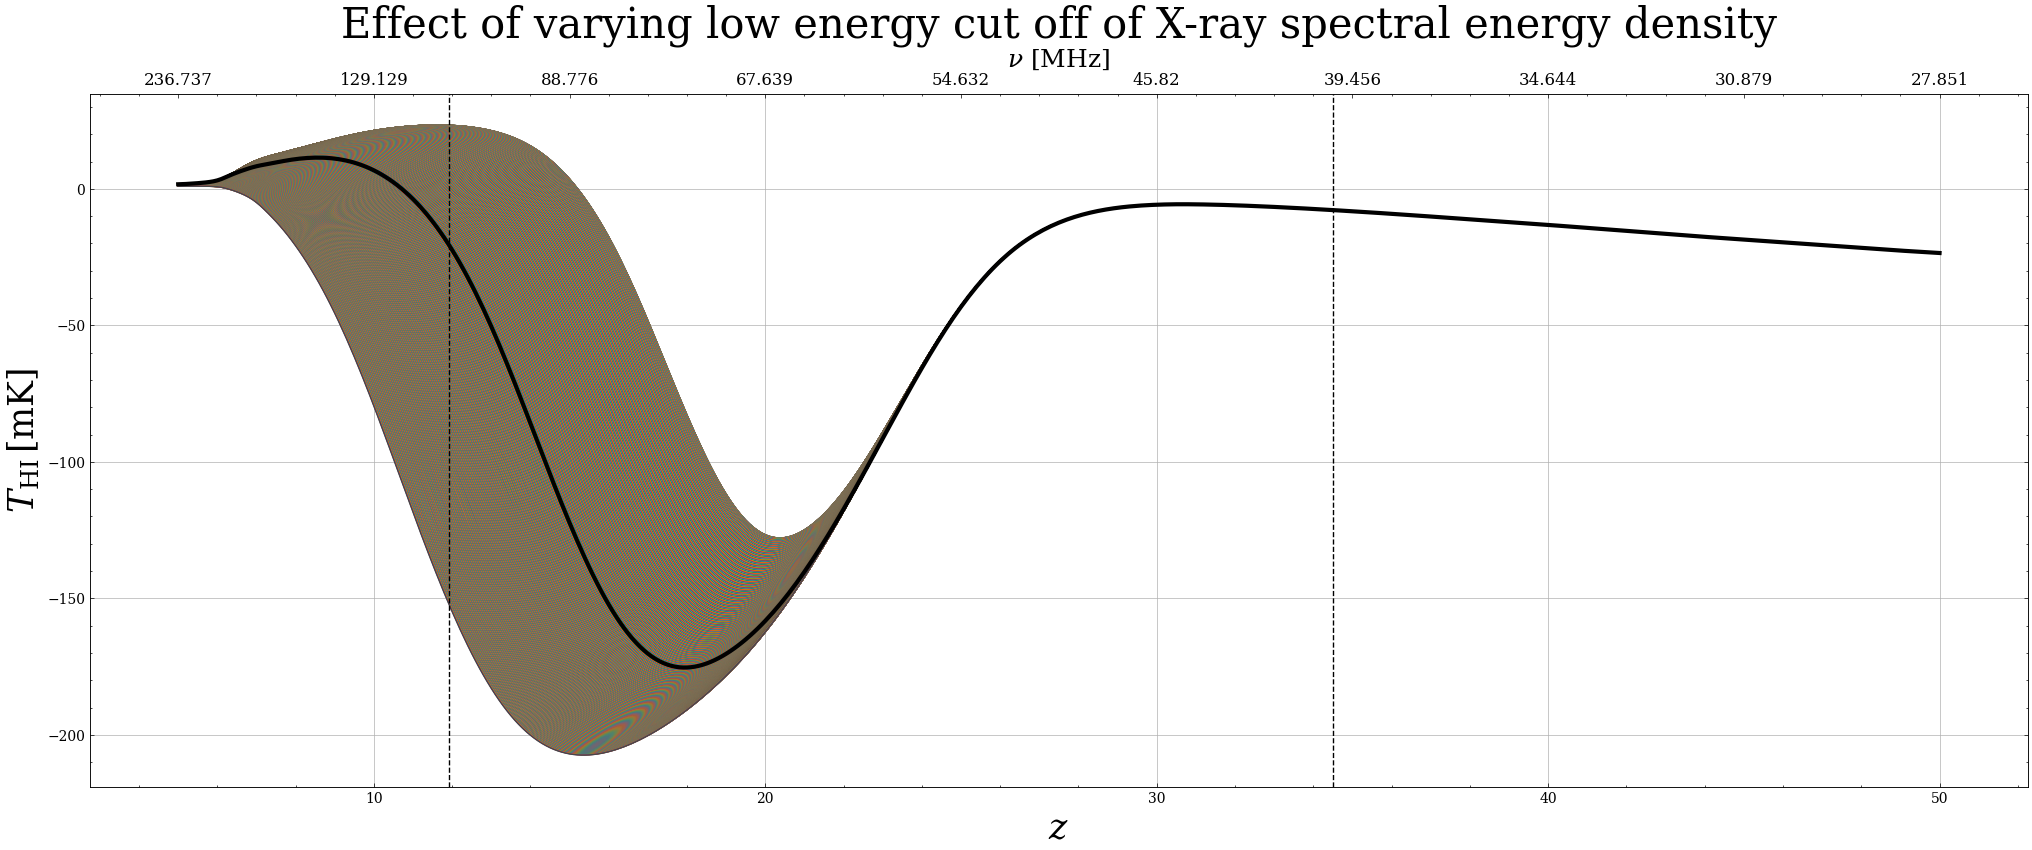

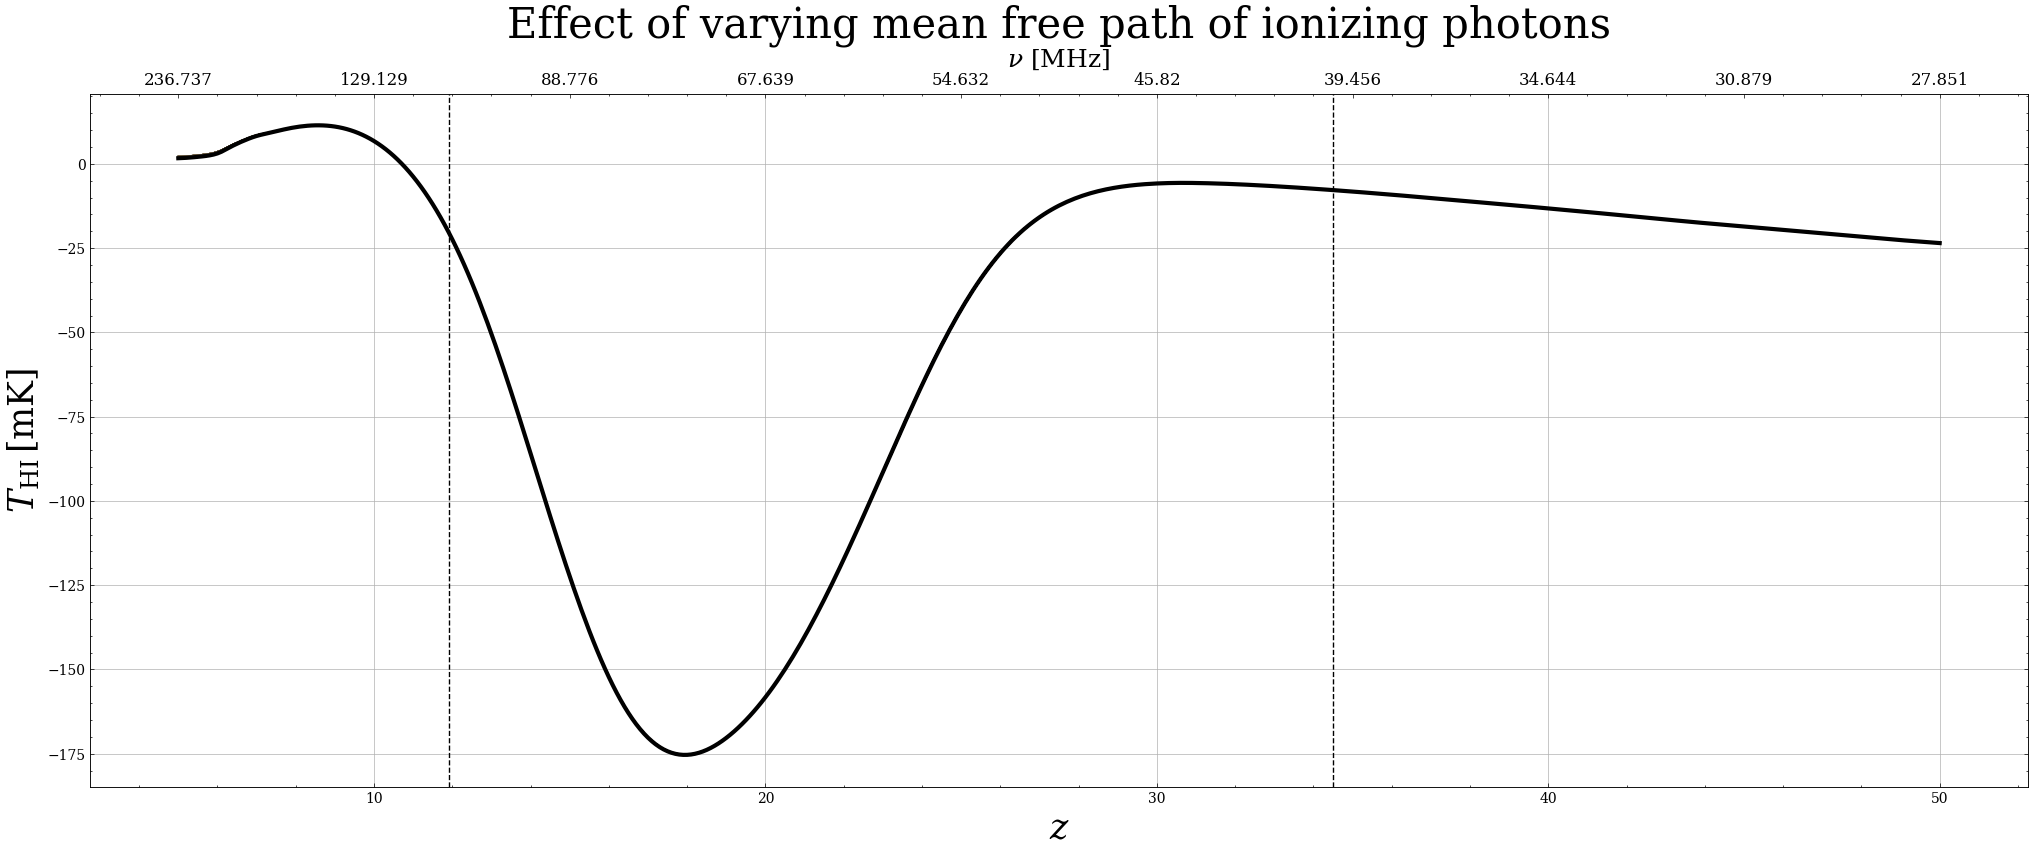

In [161]:
import os

fstar_range = np.linspace(0.0001, 0.5, 1000)
vc_range = np.linspace(4.2, 100, 1000)
fx_range = np.linspace(0, 1000, 1000)
tau_range = np.linspace(0.04, 0.2, 1000)
alpha_range = np.linspace(1.0, 1.5, 1000)
nu_min_range = np.linspace(0.1, 3.0, 1000)
R_mfp_range = np.linspace(10, 50, 1000)
parameters = ['fstar', 'vc', 'fx', 'tau', 'alpha', 'nu_min', 'R_mfp']
ranges = [fstar_range, vc_range, fx_range, tau_range, alpha_range, nu_min_range, R_mfp_range]
constant_values = [fstar, vc, fx, tau, alpha, nu_min, R_mfp]
strings = ["star formation efficiency", "virial circular velocity", "X-ray efficiency of sources", "CMB optical depth", "X-ray spectral energy density slope", "low energy cut off of X-ray spectral energy density", "mean free path of ionizing photons"]
predictor = evaluate(base_dir='T_release/') # Redshift-Temperature Network

output_dir = 'simulated_signals'

for i, (param, string, param_range) in enumerate(zip(parameters, strings, ranges)):
    varied_params = constant_values.copy()
    plt.figure(figsize=(25, 9))
    ax = plt.gca()
   
    for value in param_range:
        varied_params[i] = value
        signal_redshift_temp, z_redshift_temp = predictor(varied_params)
        nu_redshift_temp = z_to_nu(z_redshift_temp)

        ax.plot(z_redshift_temp, signal_redshift_temp)


        os.makedirs(output_dir, exist_ok=True)
        parts = [f"{parameters[j]}_{float(varied_params[j]):.6g}" for j in range(len(parameters))]
        safe_parts = [p.replace('.', 'p').replace('-', 'm') for p in parts]
        filename = os.path.join(output_dir, "signal_" + "_".join(safe_parts) + ".csv")

        # data = np.column_stack([nu_redshift_temp, signal_redshift_temp])
        data = np.column_stack([nu_redshift_temp[::-1], signal_redshift_temp[::-1]])
        
        nu = data[:, 0]
        signal = data[:, 1]
        # nu_new = np.arange(nu.min(), nu.max() + 1, 1)
        nu_new = np.arange(int(np.ceil(nu.min())), int(np.floor(nu.max())) + 1, 1)

        signal_new = np.interp(nu_new, nu, signal)
        data_interp = np.column_stack([nu_new, signal_new])


        np.savetxt(filename, data_interp, delimiter=',', header='frequency_MHz,signal_mK', comments='', fmt='%.6e')

    signal_redshift_temp_default, z_redshift_temp_default = predictor(constant_values)
    ax.plot(z_redshift_temp_default, signal_redshift_temp_default, color='black', linewidth=3)

    ax.set_xlabel(r'$z$', fontsize=25)
    ax.set_ylabel(r'$T_{\mathrm{HI}}\,[\mathrm{mK}]$', fontsize=25)
    ax.set_title(f'Effect of varying {string}', fontsize=30)
    ax.grid()

    # top x-axis showing frequency corresponding to the redshift points
    ax_top = ax.twiny()
    ax_top.set_xlim(ax.get_xlim())
    ax_top.axvline(x=nu_to_z(40), color='black', linestyle='--', linewidth=1)
    ax_top.axvline(x=nu_to_z(110), color='black', linestyle='--', linewidth=1)
    # choose a manageable number of tick labels
    num_ticks = 10
    indices = np.linspace(0, len(z_redshift_temp)-1, num_ticks, dtype=int)
    ticks_z = z_redshift_temp[indices]
    labels_nu = np.round(nu_redshift_temp[indices], 3)

    ax_top.set_xticks(ticks_z)
    ax_top.set_xticklabels(labels_nu, fontsize=12)
    ax_top.set_xlabel(r'$\nu\ [\mathrm{MHz}]$', fontsize=18)


    plt.show()


In [162]:
params = [fstar, vc, fx, nu_min, tau, alpha, R_mfp]

predictor = evaluate(base_dir='xHI_release/') # Redshift-Neutral Fraction Network
signal_redshift_neutral_frac, z_redshift_neutral_frac = predictor(params)

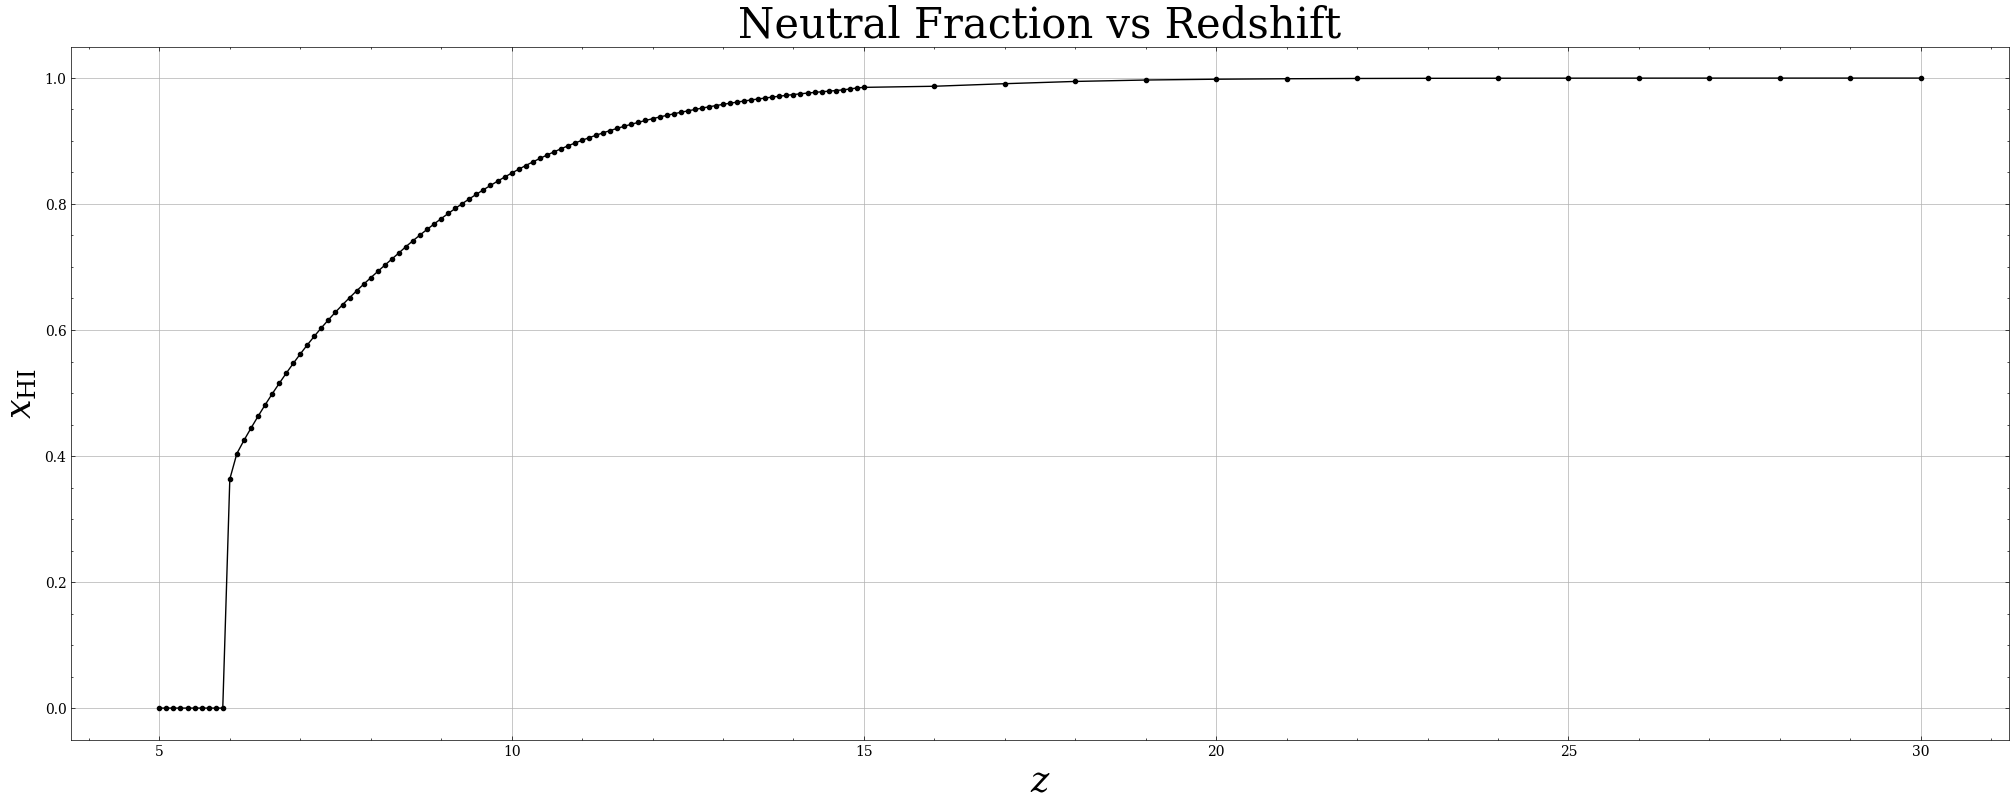

In [163]:

plt.figure(figsize=(25,9))
plt.plot(z_redshift_neutral_frac, signal_redshift_neutral_frac, 'o-', color='black', markersize=3)
plt.xlabel(r'$z$', fontsize=25)
plt.ylabel(r'$x_{\mathrm{HI}}$', fontsize=25)
plt.title('Neutral Fraction vs Redshift', fontsize=30)
plt.grid()
plt.show()